In [1]:
import numpy as np
import pandas as pd
import cv2
import os 
import fnmatch

In [2]:
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\Lab_tested_data.csv')
Lab_tested_data = Lab_tested_data.fillna(method='ffill')
Lab_tested_data.to_csv("Pre_processed_lab_tested_data.csv")

In [3]:
Sample_ID = Lab_tested_data.iloc[:,0]
PH_Value = Lab_tested_data.iloc[:,2]

In [4]:
def load_images_from_folder(folder):
    Labels = []
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        img = img[100:1100,100:1100]
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result];
        if len(Result) > 1:
            Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
            Id_1_index = Result[0]
            Id_2_index = Result[1]
            print(id)
            Labels.append([filename,img,(PH_Value[Id_1_index]+PH_Value[Id_2_index])/2])
        else:
            continue
    return Labels

In [5]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\Mixed_data')

110638.0
110638.0
110639.0
110639.0
110640.0
110640.0
110641.0
110641.0
110642.0
110642.0
110643.0
110643.0
110644.0
110644.0
110645.0
110645.0
110646.0
110646.0
110648.0
110648.0
110649.0
110649.0
110650.0
110650.0
110651.0
110651.0
110652.0
110652.0
110653.0
110653.0
110654.0
110654.0
110655.0
110655.0
110656.0
110656.0
110657.0
110657.0
110658.0
110658.0
110659.0
110659.0
110660.0
110660.0
110661.0
110661.0
110662.0
110662.0
110663.0
110663.0
110664.0
110664.0
110665.0
110665.0
110667.0
110667.0
110734.0
110734.0
110735.0
110735.0
110736.0
110736.0
110737.0
110737.0
110738.0
110738.0
110740.0
110740.0
110745.0
110745.0
110746.0
110746.0
110747.0
110747.0
110749.0
110749.0
110750.0
110750.0
110752.0
110752.0
110753.0
110753.0
110755.0
110755.0
110756.0
110756.0
110757.0
110757.0
110759.0
110759.0
110760.0
110760.0
110761.0
110761.0
110762.0
110762.0
110763.0
110763.0
110766.0
110766.0
110767.0
110767.0
110768.0
110768.0
110773.0
110773.0
110775.0
110775.0
110776.0
110776.0
110777.0
1

In [6]:
len(dataset)

701

In [7]:
Ph_index = []
for data in dataset:
    image = data[1]
    # extracting blue,red,green channel from color image
    blue_channel = image[:,:,0]
    green_channel = image[:,:,1]
    red_channel = image[:,:,2]
    temp = (np.median(red_channel)/np.median(green_channel))/np.median(blue_channel)
    temp = np.nanmean(temp)
    print(temp)
    Ph_index.append([temp,data[2]])

0.007230565182047662
0.006654965628199503
0.006142346441338967
0.006239913932221624
0.006622023809523809
0.006280268708014373
0.019096209912536445
0.013522727272727271
0.006977565801095213
0.005974559938327123
0.006525670257095683
0.007928364891334763
0.006275775506544737
0.006374085684430512
0.006469979296066253
0.0063758977053774745
0.006696970748464555
0.006046188918624244
0.006483482556344551
0.007119682768565249
0.006094952951240376
0.005523877405559516
0.006060606060606061
0.005949952400380797
0.006157974404843815
0.005810220852593734
0.00561643417478099
0.005773170277484636
0.006749829118250171
0.006527673378961111
0.00684931506849315
0.006779523403564325
0.006734006734006734
0.005618334179786693
0.005780539962576851
0.006320877486521658
0.006445564279854682
0.005522745411013568
0.005916305916305916
0.0058823529411764705
0.006451009723261032
0.00588512241054614
0.005936592143488696
0.0059355568117580556
0.006340865300402873
0.0061723776746969924
0.006478745169356671
0.0060547681

0.007835802032253172
0.007791217173368203
0.009785932721712538
0.00683982683982684
0.00723387946727987
0.006363601722364059
0.00817686250757117
0.006860098965362123
0.006577615867233354
0.007193158953722334
0.00810401119402985
0.005823061688983477
0.006608569353667393
0.006724870221802737
0.006368765359454501
0.008097808828199427
0.006151902101622773
0.006307258632840028
0.006596004270245539
0.006639644856205366
0.007478427612655801
0.005419839255499153
0.005375139977603583
0.00741704619388419
0.005342451116572284
0.006804572672836145
0.006584821428571429
0.007323724191663421
0.0057116104868913855
0.006425528842682839
0.006772368735558919
0.008901548869503293
0.008407031335298614
0.007430488974113135
0.00783649264005083
0.01060406611086734
0.012835249042145594
0.00624103299856528
0.008676131537434777
0.005947607591553061
0.006440857770705464
0.005945499587118083
0.0061234263820470715
0.006368919672000637
0.007463032494321606
0.006080634500991409
0.006201275690999291
0.00632255042986652

In [8]:
data1 = pd.DataFrame(Ph_index,columns=['PH_Index','PH_Value'])

In [9]:
data1.to_csv("Ph_Index_with_Ph_value.csv")

print(data1)

     PH_Index  PH_Value
0    0.007231      7.95
1    0.006655      7.95
2    0.006142      7.90
3    0.006240      7.90
4    0.006622      7.75
..        ...       ...
696  0.007710      7.85
697  0.004352      7.80
698  0.007780      7.80
699  0.015429      7.75
700  0.012199      7.75

[701 rows x 2 columns]


In [10]:
import matplotlib.pyplot as plt

In [11]:
data2 = pd.read_csv("Ph_Index_with_Ph_value.csv")

In [12]:
Ph_index = data2.iloc[:,1]

In [13]:
Ph_value = data2.iloc[:,2]

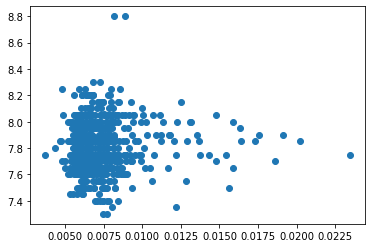

In [14]:
plt.scatter(Ph_index,Ph_value)

In [15]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=1, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(Ph_index, Ph_value ,batch_size = 20, epochs = 500, verbose=1)


Epoch 1/500
36/36 [==============================] - 0s 878us/step - loss: 60.6032
Epoch 2/500
36/36 [==============================] - 0s 443us/step - loss: 59.5592
Epoch 3/500
36/36 [==============================] - 0s 456us/step - loss: 57.9625
Epoch 4/500
36/36 [==============================] - 0s 404us/step - loss: 55.6533
Epoch 5/500
36/36 [==============================] - 0s 388us/step - loss: 52.5789
Epoch 6/500
36/36 [==============================] - 0s 416us/step - loss: 48.8054
Epoch 7/500
36/36 [==============================] - 0s 360us/step - loss: 44.5155
Epoch 8/500
36/36 [==============================] - 0s 388us/step - loss: 39.9577
Epoch 9/500
36/36 [==============================] - 0s 376us/step - loss: 35.3934
Epoch 10/500
36/36 [==============================] - 0s 360us/step - loss: 31.0420
Epoch 11/500
36/36 [==============================] - 0s 399us/step - loss: 27.0417
Epoch 12/500
36/36 [==============================] - 0s 389us/step - loss: 23.4618
E

36/36 [==============================] - 0s 388us/step - loss: 0.0351
Epoch 100/500
36/36 [==============================] - 0s 417us/step - loss: 0.0351
Epoch 101/500
36/36 [==============================] - 0s 409us/step - loss: 0.0351
Epoch 102/500
36/36 [==============================] - 0s 387us/step - loss: 0.0351
Epoch 103/500
36/36 [==============================] - 0s 389us/step - loss: 0.0351
Epoch 104/500
36/36 [==============================] - 0s 388us/step - loss: 0.0351
Epoch 105/500
36/36 [==============================] - 0s 376us/step - loss: 0.0351
Epoch 106/500
36/36 [==============================] - 0s 383us/step - loss: 0.0351
Epoch 107/500
36/36 [==============================] - 0s 387us/step - loss: 0.0351
Epoch 108/500
36/36 [==============================] - 0s 415us/step - loss: 0.0351
Epoch 109/500
36/36 [==============================] - 0s 360us/step - loss: 0.0351
Epoch 110/500
36/36 [==============================] - 0s 360us/step - loss: 0.0352
Epoch 

36/36 [==============================] - 0s 360us/step - loss: 0.0352
Epoch 197/500
36/36 [==============================] - 0s 439us/step - loss: 0.0352
Epoch 198/500
36/36 [==============================] - 0s 428us/step - loss: 0.0352
Epoch 199/500
36/36 [==============================] - 0s 378us/step - loss: 0.0351
Epoch 200/500
36/36 [==============================] - 0s 412us/step - loss: 0.0351
Epoch 201/500
36/36 [==============================] - 0s 388us/step - loss: 0.0351
Epoch 202/500
36/36 [==============================] - 0s 416us/step - loss: 0.0352
Epoch 203/500
36/36 [==============================] - 0s 388us/step - loss: 0.0353
Epoch 204/500
36/36 [==============================] - 0s 360us/step - loss: 0.0353
Epoch 205/500
36/36 [==============================] - 0s 363us/step - loss: 0.0352
Epoch 206/500
36/36 [==============================] - 0s 389us/step - loss: 0.0352
Epoch 207/500
36/36 [==============================] - 0s 388us/step - loss: 0.0352
Epoch 

36/36 [==============================] - 0s 387us/step - loss: 0.0354
Epoch 294/500
36/36 [==============================] - 0s 388us/step - loss: 0.0352
Epoch 295/500
36/36 [==============================] - 0s 370us/step - loss: 0.0352
Epoch 296/500
36/36 [==============================] - 0s 374us/step - loss: 0.0352
Epoch 297/500
36/36 [==============================] - 0s 361us/step - loss: 0.0352
Epoch 298/500
36/36 [==============================] - 0s 387us/step - loss: 0.0352
Epoch 299/500
36/36 [==============================] - 0s 388us/step - loss: 0.0352
Epoch 300/500
36/36 [==============================] - 0s 403us/step - loss: 0.0353
Epoch 301/500
36/36 [==============================] - 0s 373us/step - loss: 0.0354
Epoch 302/500
36/36 [==============================] - 0s 333us/step - loss: 0.0352
Epoch 303/500
36/36 [==============================] - 0s 359us/step - loss: 0.0353
Epoch 304/500
36/36 [==============================] - 0s 388us/step - loss: 0.0355
Epoch 

36/36 [==============================] - 0s 414us/step - loss: 0.0353
Epoch 391/500
36/36 [==============================] - 0s 363us/step - loss: 0.0352
Epoch 392/500
36/36 [==============================] - 0s 415us/step - loss: 0.0353
Epoch 393/500
36/36 [==============================] - 0s 415us/step - loss: 0.0352
Epoch 394/500
36/36 [==============================] - ETA: 0s - loss: 0.035 - 0s 456us/step - loss: 0.0355
Epoch 395/500
36/36 [==============================] - 0s 358us/step - loss: 0.0355
Epoch 396/500
36/36 [==============================] - 0s 423us/step - loss: 0.0356
Epoch 397/500
36/36 [==============================] - 0s 423us/step - loss: 0.0352
Epoch 398/500
36/36 [==============================] - 0s 390us/step - loss: 0.0353
Epoch 399/500
36/36 [==============================] - 0s 386us/step - loss: 0.0352
Epoch 400/500
36/36 [==============================] - 0s 386us/step - loss: 0.0367
Epoch 401/500
36/36 [==============================] - 0s 380us/st

36/36 [==============================] - 0s 387us/step - loss: 0.0353
Epoch 488/500
36/36 [==============================] - 0s 403us/step - loss: 0.0352
Epoch 489/500
36/36 [==============================] - 0s 387us/step - loss: 0.0352
Epoch 490/500
36/36 [==============================] - 0s 388us/step - loss: 0.0354
Epoch 491/500
36/36 [==============================] - 0s 387us/step - loss: 0.0352
Epoch 492/500
36/36 [==============================] - 0s 415us/step - loss: 0.0356
Epoch 493/500
36/36 [==============================] - 0s 415us/step - loss: 0.0355
Epoch 494/500
36/36 [==============================] - 0s 359us/step - loss: 0.0354
Epoch 495/500
36/36 [==============================] - 0s 386us/step - loss: 0.0353
Epoch 496/500
36/36 [==============================] - 0s 388us/step - loss: 0.0354
Epoch 497/500
36/36 [==============================] - 0s 388us/step - loss: 0.0352
Epoch 498/500
36/36 [==============================] - 0s 443us/step - loss: 0.0353
Epoch 

In [16]:
model.predict(Ph_index)

array([[7.819431 ],
       [7.819066 ],
       [7.8187404],
       [7.818803 ],
       [7.819045 ],
       [7.818828 ],
       [7.826786 ],
       [7.823369 ],
       [7.81927  ],
       [7.818634 ],
       [7.818984 ],
       [7.819871 ],
       [7.8188257],
       [7.8188877],
       [7.8189483],
       [7.8188887],
       [7.819092 ],
       [7.81868  ],
       [7.818957 ],
       [7.8193607],
       [7.818711 ],
       [7.818348 ],
       [7.8186884],
       [7.818619 ],
       [7.818751 ],
       [7.8185296],
       [7.818406 ],
       [7.8185062],
       [7.819126 ],
       [7.818985 ],
       [7.819189 ],
       [7.8191447],
       [7.8191166],
       [7.8184075],
       [7.818511 ],
       [7.8188543],
       [7.8189335],
       [7.8183465],
       [7.8185973],
       [7.8185754],
       [7.818937 ],
       [7.818578 ],
       [7.81861  ],
       [7.818609 ],
       [7.8188667],
       [7.81876  ],
       [7.818954 ],
       [7.8186855],
       [7.819063 ],
       [7.8186893],


In [17]:
model.history.on_batch_begin

<bound method Callback.on_batch_begin of <tensorflow.python.keras.callbacks.History object at 0x000001C38F81EBE0>>

In [18]:
Ph_index[0]

0.0072305651820476

In [ ]:
import cv2
img = cv2.imread("image.jpg")
cropped_image = img[100:1100,100:1100]
# Display cropped image
cv2.imshow("cropped", cropped_image)

# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)

cv2.waitKey(0)
cv2.destroyAllWindows()